> __Content modified under Creative Commons Attribution license CC-BY
> 4.0, code under BSD 3-Clause License © 2020 R.C. Cooper__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
plt.rcParams['lines.linewidth'] = 3

# Homework

## Problems [Part 1](./01_Interacting_with_Python.md)

1. Calculate some properties of a rectangular box that is 12.5"$\times$11"$\times$14" and weighs 31 lbs

    a. What is the volume of the box?
    
    b. What is the average density of the box?
    
    c. What is the result of the following logical operation, `volume>1000` (in inches^3)

In [2]:
w = 12.5
l = 11
h = 14
m = 31

V = w*l*h

print('V= {} in^3' .format(V))

V= 1925.0 in^3


In [3]:
print('Density is {:1.3f} lb/in^3' .format(m/V))

Density is 0.016 lb/in^3


In [4]:
if V>1000:
    print('Volume is greater than 1000 in^3')
else:
    print('Volume is not greater than 1000 in^3')

Volume is greater than 1000 in^3


2. Use the variables given below, `str1` and `str2`, and check the following 

    a. `str1<str2`
    
    b. `str1==str2`
    
    c. `str1>str2`
    
    d. How could you force (b) to be true? [Hint](https://docs.python.org/3/library/stdtypes.html?highlight=str.lower#str.lower) or [Hint](https://docs.python.org/3/library/stdtypes.html?highlight=str.lower#str.upper)

In [5]:
str1 = 'Python'
str2 = 'python'

comp1 = str1<str2
comp2 = str1==str2
comp3 = str1>str2

print('str1<str2 is {}'.format(comp1))
print('str1==str2 is {}' .format(comp2))
print('str1>str2 is {}' .format(comp3))

str1<str2 is True
str1==str2 is False
str1>str2 is False


In [6]:
comp4 = str1.lower()==str2.lower()

print('str1==str2 is {}' .format(comp4))

str1==str2 is True


3. The following code has an error, fix the error so that the correct result is returned:

```y is 20 and x is less than y```

```python
x="1"
y=20

if x<y and y==20:
    print('y is 20 and x is less than y')
else:
    print('x is not less than y')
```

In [7]:
x=1
y=20

if x<y and y==20:
    print('y is 20 and x is less than y')
else:
    print('x is not less than y')

y is 20 and x is less than y


4. Create a script that takes the clock hour in 24 hours and prints the clock hour with am or pm. 

    Hint: Use an if-else statement with `print` commands

In [8]:
time = 24
if 24 > time > 12:
    print(time - 12, 'PM')
elif time < 12:
    print(time, 'AM')
elif time==24:
    print('12 AM')

12 AM


## Problems [Part 2](./02_Working_with_Python.md)

1. Create a function called `sincos(x)` that returns two arrays, `sinx` and `cosx` that return the sine and cosine of the input array, `x`. 

    a. Document your function with a help file in `'''help'''`
    
    b. Use your function to plot sin(x) and cos(x) for x=$0..2\pi$

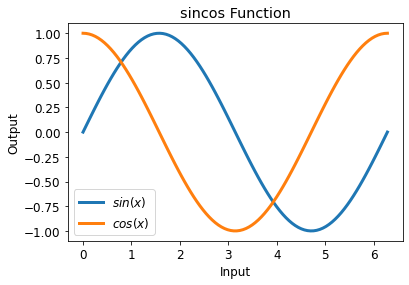

In [9]:
def sincos(x):
    '''
    Returns two arrays, sinx and cosx that return the sine and cosine of the input array, x
    '''
    sinx = np.sin(x)
    cosx = np.cos(x)
    
    return sinx, cosx

x = np.linspace(0, 2*np.pi, 100)
sincos_out = sincos(x)

plt.plot(x, sincos_out[0], label='$sin(x)$')
plt.plot(x,sincos_out[1], label='$cos(x)$')
plt.legend(loc='best')
plt.title('sincos Function')
plt.ylabel('Output')
plt.xlabel('Input');

2. Use a for-loop to create a variable called `A_99`, where every element is the product
of the two indices from 0 to 9 e.g. A_99[3,2]=6 and A_99[4,4]=16. 

    a. time your script using `%%time`    
    
    b. Calculate the mean of `A_99`

    c. Calculate the standard deviation of `A_99`

In [10]:
A_99 = np.empty([10,10], dtype=int)

In [11]:
%%timeit

for i in range(10):
    for k in range(10):
        A_99[i,k]= i*k

34.2 µs ± 6.16 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [12]:
print('The mean of A_99 is {:2.2f}'.format(np.mean(A_99)) )
print('The standard deviation of A_99 is {:2.2f}' .format(np.std(A_99)))

The mean of A_99 is 20.25
The standard deviation of A_99 is 20.05


3. Use the two arrays, X and Y, given below to create A_99 using numpy array math rather than a for-loop.

    a. time your script using `%%time`    
    
    b. Calculate the mean of `A_99`

    c. Calculate the standard deviation of `A_99`
        
    d. create a filled contour plot of X, Y, A_99 [contourf plot documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.contourf.html)

The mean of X*Y is 20.25
The standard deviation of X*Y is 20.05
CPU times: user 27.7 ms, sys: 502 µs, total: 28.2 ms
Wall time: 49.1 ms


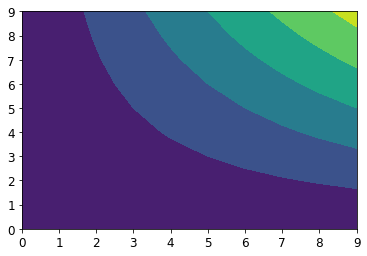

In [13]:
%%time
X, Y = np.meshgrid(np.arange(10), np.arange(10))
XY=X*Y
print('The mean of X*Y is {:2.2f}' .format(np.mean(XY)))
print('The standard deviation of X*Y is {:2.2f}' .format(np.std(XY)))

# plt.contourf([X[:,1],Y[1,:],A_99[4,:]]);
plt.contourf(X,Y,A_99)

4. The following linear interpolation function has an error. It is supposed to return y(x) given the the two points $p_1=[x_1,~y_1]$ and $p_2=[x_2,~y_2]$. Currently, it just returns and error.

```python
def linInterp(x,p1,p2):
    '''linear interplation function
    return y(x) given the two endpoints 
    p1=np.array([x1,y1])
    and
    p2=np.array([x2,y2])'''
    slope = (p2[2]-p1[2])/(p2[1]-p1[1])
    
    return p1[2]+slope*(x - p1[1])
```

In [14]:
def linInterp(x,p1,p2):
    '''linear interplation function
    return y(x) given the two endpoints 
    p1=np.array([x1,y1])
    and
    p2=np.array([x2,y2])'''
    slope = (p2[1]-p1[1])/(p2[0]-p1[0])
    
    return p1[1]+slope*(x - p1[0])

linInterp(3,[2,4], [5,2])

3.3333333333333335

## Problems [Part 3](03_Numerical_error.md)

1. The growth of populations of organisms has many engineering and scientific applications. One of the simplest
models assumes that the rate of change of the population p is proportional to the existing population at any time t:

$\frac{dp}{dt} = k_g p$

where $t$ is time in years, and $k_g$ is growth rate in \[1/years\]. 

The world population has been increasing dramatically, let's make a prediction based upon the [following data](https://worldpopulationhistory.org/map/2020/mercator/1/0/25/) saved in [world_population_1900-2020.csv](../data/world_population_1900-2020.csv):


|year| world population |
|---|---|
|1900|1,578,000,000|
|1950|2,526,000,000|
|2000|6,127,000,000|
|2020|7,795,482,000|

a. Use a growth rate of $k_g=0.013$ [1/years] and compare the analytical solution (use initial condition p(1900) = 1578000000) to the Euler integration for time steps of 20 years from 1900 to 2020 (Hint: use method (1)- plot the two solutions together with the given data) 

b. Discussion question: If you decrease the time steps further and the solution converges, will it converge to the actual world population? Why or why not? 

**Note: We have used a new function `np.loadtxt` here. Use the `help` or `?` to learn about what this function does and how the arguments can change the output. In the next module, we will go into more details on how to load data, plot data, and present trends.**

In [15]:
import numpy as np
year, pop = np.loadtxt('../data/world_population_1900-2020.csv',skiprows=1,delimiter=',',unpack=True)
print('years=',year)
print('population =', pop)

years= [1900. 1950. 2000. 2020.]
population = [1.578000e+09 2.526000e+09 6.127000e+09 7.795482e+09]


In [16]:
print('average population changes 1900-1950, 1950-2000, 2000-2020')
print((pop[1:] - pop[0:-1])/(year[1:] - year[0:-1]))
print('average growth of 1900 - 2020')
print(np.mean((pop[1:] - pop[0:-1])/(year[1:] - year[0:-1])))

average population changes 1900-1950, 1950-2000, 2000-2020
[18960000. 72020000. 83424100.]
average growth of 1900 - 2020
58134700.0


In [17]:
t= np.linspace(1900,2020,5)
P= np.empty(len(t))

dt= t[1]-t[0]

k = 0.013

P[0]= 1578000000

for i in range(1,len(t)):
    P[i] = P[i-1] + k*P[i-1]*dt
    
exp_growth= lambda year: pop[0] *np.exp(k*(year-1900))
    
# plt.plot(np.linspace(1900, 2020), exp_growth(np.linspace(1900,2020)), label='In class analytical')
# plt.plot(t,P, label='Euler Integration')
# plt.plot(year,pop, 's', label='Given Data')
# plt.title('Population vs. Year')
# plt.xlabel('Year')
# plt.ylabel('Population')
# plt.legend(loc='best' );

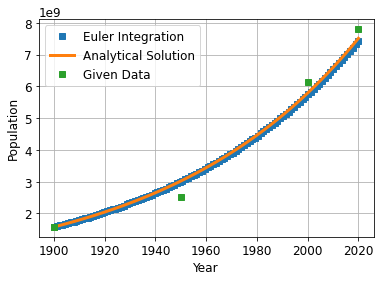

In [18]:
t= np.linspace(1900, 2020, 110)
NumPop = np.zeros(len(t))
NumPop[0] = pop[0]

for i in range(1, len(t)):
    NumPop[i] = k*NumPop[i-1]*(t[i] - t[i-1]) + NumPop[i-1]
    
plt.plot(t, NumPop, 's', label='Euler Integration')
plt.plot(np.linspace(1900, 2020), exp_growth(np.linspace(1900,2020)), label='Analytical Solution')
plt.plot(year,pop, 's', label='Given Data')
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(axis='both')

As the number of time steps increase, the approximation will not converge to the actual world population. This is because this is not a perfect model and will not be able to converge to the actual population. It converges to the analytical solution.

__d.__ As the number of time steps increases, the Euler approximation approaches the analytical solution, not the measured data. The best-case scenario is that the Euler solution is the same as the analytical solution.

2. In the freefall example you used smaller time steps to decrease the **truncation error** in our Euler approximation. Another way to decrease approximation error is to continue expanding the Taylor series. Consider the function f(x)

    $f(x)=e^x = 1+x+\frac{x^2}{2!}+\frac{x^3}{3!}+\frac{x^4}{4!}+...$

    We can approximate $e^x$ as $1+x$ (first order), $1+x+x^2/2$ (second order), and so on each higher order results in smaller error. 
    
    a. Use the given `exptaylor` function to approximate the value of exp(1) with a second-order Taylor series expansion. What is the relative error compared to `np.exp(1)`?
    
    b. Time the solution for a second-order Taylor series and a tenth-order Taylor series. How long would a 100,000-order series take (approximate this, you don't have to run it)
    
    c. Plot the relative error as a function of the Taylor series expansion order from first order upwards. (Hint: use method (4) in the comparison methods from the "Truncation and roundoff error accumulation in log-log plot" figure)

In [19]:
from math import factorial
def exptaylor(x,n):
    '''Taylor series expansion about x=0 for the function e^x
    the full expansion follows the function
    e^x = 1+ x + x**2/2! + x**3/3! + x**4/4! + x**5/5! +...'''
    if n<1:
        print('lowest order expansion is 0 where e^x = 1')
        return 1
    else:
        ex = 1+x # define the first-order taylor series result
        for i in range(1,n):
            ex+=x**(i+1)/factorial(i+1) # add the nth-order result for each step in loop
        return ex
        

In [20]:
fun_val= exptaylor(1,2)

np_val= np.exp(1)

percent_er= np.abs((fun_val-np_val)/np_val)

print('The relative error is {:1.3f}' .format(percent_er) )

The relative error is 0.080


In [21]:
%%timeit
exptaylor(1,2)

1.32 µs ± 254 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [22]:
%%timeit
exptaylor(1,10)

5.84 µs ± 1.08 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


The second order expansion takes about 1.52 $\mu s$ while the 10th order takes about 6.57 $\mu s$

In [23]:
def linInterp(x,p1,p2):
    '''linear interplation function
    return y(x) given the two endpoints 
    p1=np.array([x1,y1])
    and
    p2=np.array([x2,y2])'''
    slope = (p2[1]-p1[1])/(p2[0]-p1[0])
    
    return p1[1]+slope*(x - p1[0])



print('A 100,000 order expansion would take about {:4.1f} micro seconds' .format(linInterp(100000,[2,1.52],[10,6.57])))

A 100,000 order expansion would take about 63125.3 micro seconds


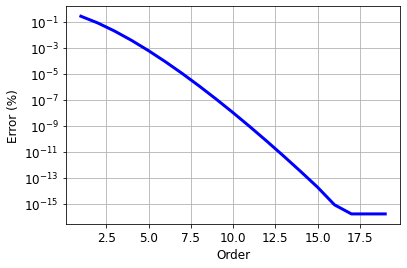

In [24]:
exp1taylor = np.array([exptaylor(1,n) for n in np.arange(1,20)])
rel_error = np.abs(exp1taylor-np.exp(1))/np.exp(1)

plt.semilogy(np.arange(1,20), rel_error,color='b', linestyle='-')
plt.xlabel('Order')
plt.ylabel('Error (%)')
plt.grid(axis='both')